# Customer Segmentation Analysis
   # with Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Load the dataset

In [2]:
data=pd.read_csv("Mall_Customers[1].csv")

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Checks the null values

In [5]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
data.describe() # Statistical Values

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

# EDA

In [8]:
print(data['Genre'].dtype)

object


In [9]:
data['Genre'] = data['Genre'].astype('category')

C:\Users\Asus\AppData\Local\Temp\ipykernel_3548\2317092479.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

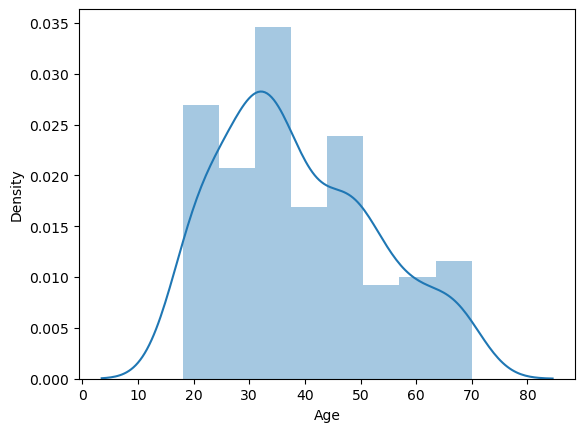

In [10]:
sns.distplot(data['Age'])

<Axes: title={'center': 'PIE'}, xlabel='Genre'>

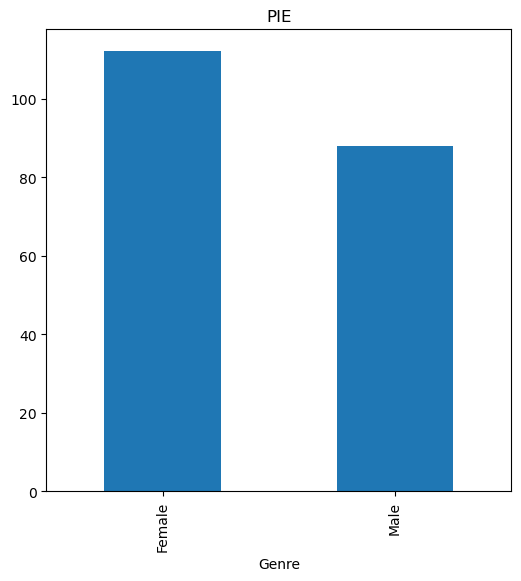

In [11]:
data.groupby('Genre').size().plot(kind="bar",figsize=(6,6),title="PIE")

C:\Users\Asus\AppData\Local\Temp\ipykernel_3548\420288474.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Annual Income (k$)'])


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

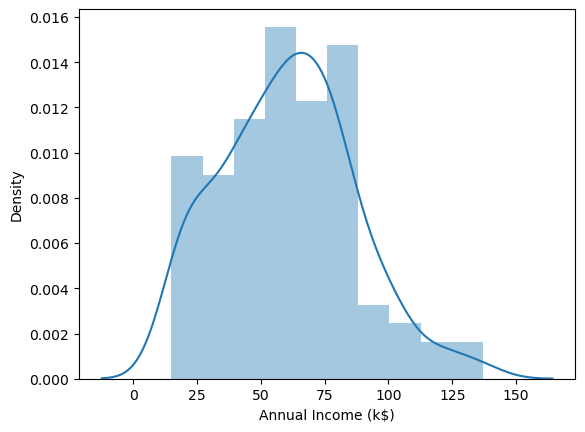

In [12]:
sns.distplot(data['Annual Income (k$)'])

C:\Users\Asus\AppData\Local\Temp\ipykernel_3548\3094342287.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Spending Score (1-100)'])


<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

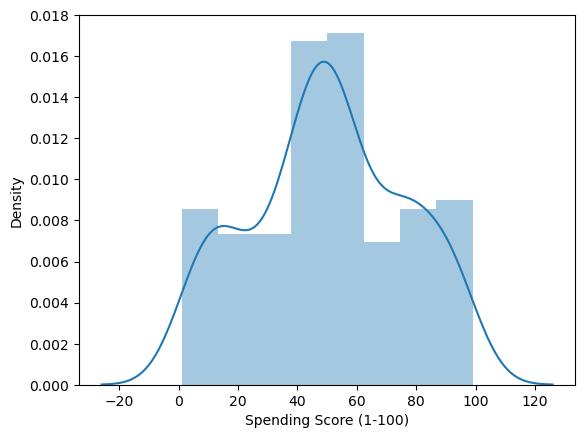

In [13]:
sns.distplot(data['Spending Score (1-100)'])

In [14]:
#correlation matrix


In [15]:
data['Genre'] = data['Genre'].astype('category').cat.codes

In [16]:
corr=data.corr()

<Axes: >

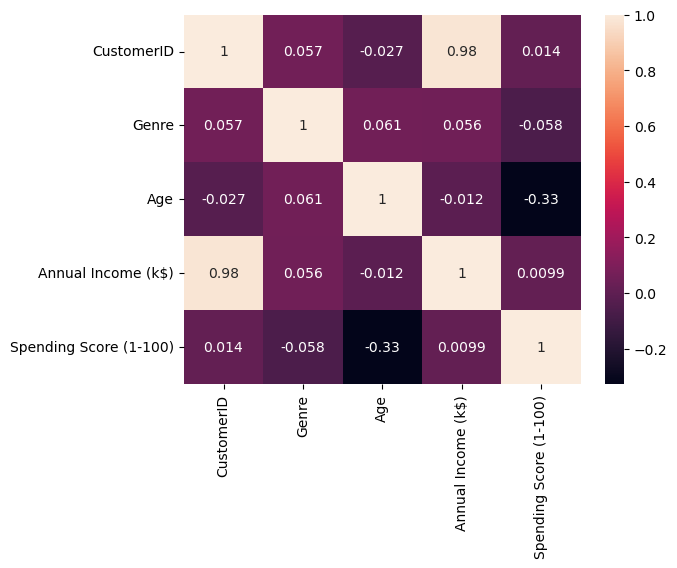

In [17]:
sns.heatmap(corr,annot=True)

Clustering based on 2 feature

In [19]:
df1=data[["CustomerID","Genre","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)","Spending Score (1-100)"]]

In [20]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


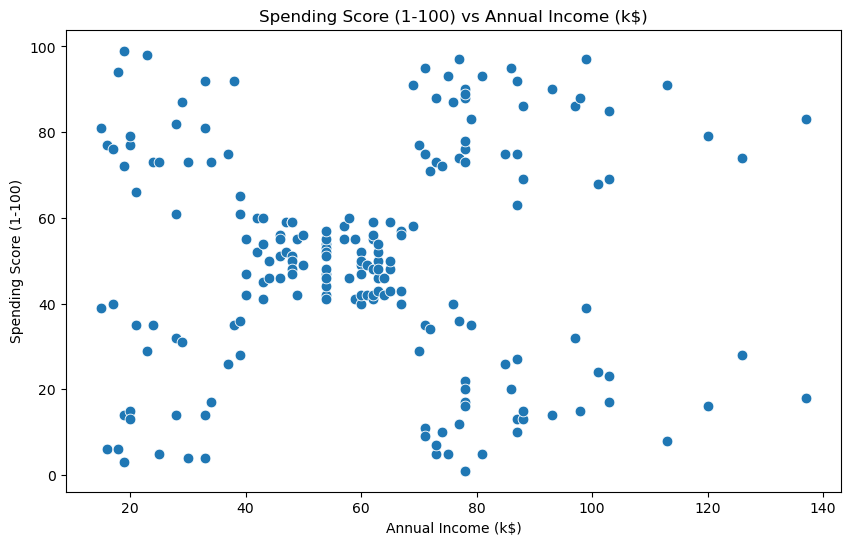

In [21]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = X  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [22]:
df1=data[["CustomerID","Genre","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)","Age"]]

In [23]:
X.head()

,Annual Income (k$),Age
0,15,19
1,15,21
2,16,20
3,16,23
4,17,31


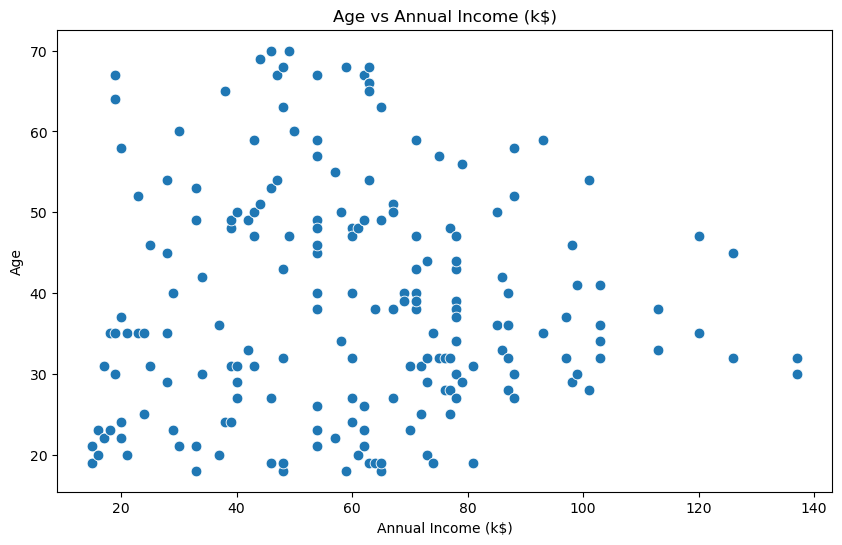

In [24]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Age',  data = X  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age') 
plt.title('Age vs Annual Income (k$)')
plt.show()

In [25]:
df1=data[["CustomerID","Genre","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Spending Score (1-100)","Age"]]

In [26]:
X.head()

,Spending Score (1-100),Age
0,39,19
1,81,21
2,6,20
3,77,23
4,40,31


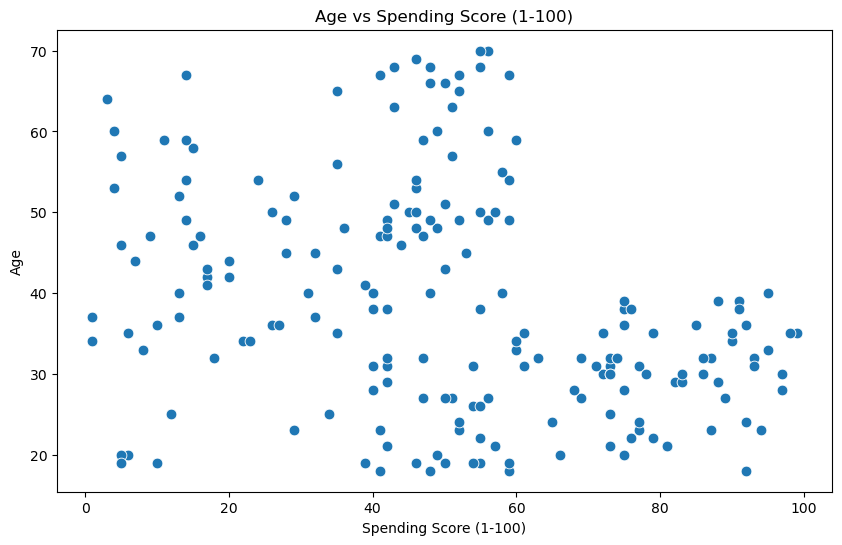

In [27]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Spending Score (1-100)',y = 'Age',  data = X  ,s = 60 )
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Age') 
plt.title('Age vs Spending Score (1-100)')
plt.show()

 # Feature Engineering

In [29]:
data['AGE_GROUP']=data['Age'].apply(lambda x:'18-25' if x<26 else '26-40' if 25<x<41 else '41-55' if 40<x<56 else '55+' if 55<x else 0 )
del data['Age']

In [30]:
data.head()

,CustomerID,Genre,Annual Income (k$),Spending Score (1-100),AGE_GROUP
0,1,1,15,39,18-25
1,2,1,15,81,18-25
2,3,0,16,6,18-25
3,4,0,16,77,18-25
4,5,0,17,40,26-40


In [31]:
data['Income_Range']=data['Annual Income (k$)'].apply(lambda x:'15-25' if x<26 else '26-50' if 25<x<51 else '51-80' if 50<x<81 else '81-100' if 80<x<101 else '100+' if 100<x else 0)

del data['Annual Income (k$)']

In [32]:
data.head()

,CustomerID,Genre,Spending Score (1-100),AGE_GROUP,Income_Range
0,1,1,39,18-25,15-25
1,2,1,81,18-25,15-25
2,3,0,6,18-25,15-25
3,4,0,77,18-25,15-25
4,5,0,40,26-40,15-25


In [33]:
data['Spending Score (1-100)'].max()

99

In [34]:
data['Spending Score (1-100)'].min()

1

In [36]:
data['Score_Range']=data['Spending Score (1-100)'].apply(lambda x:'01-10' if x<11 else '11-30' if 10<x<31 else '31-60' if 30<x<61 else '61-80' if 60<x<81 else '81+' if 80<x else 0)

del data['Spending Score (1-100)']
data.head()

,CustomerID,Genre,AGE_GROUP,Income_Range,Score_Range
0,1,1,18-25,15-25,31-60
1,2,1,18-25,15-25,81+
2,3,0,18-25,15-25,01-10
3,4,0,18-25,15-25,61-80
4,5,0,26-40,15-25,31-60


<Axes: xlabel='AGE_GROUP'>

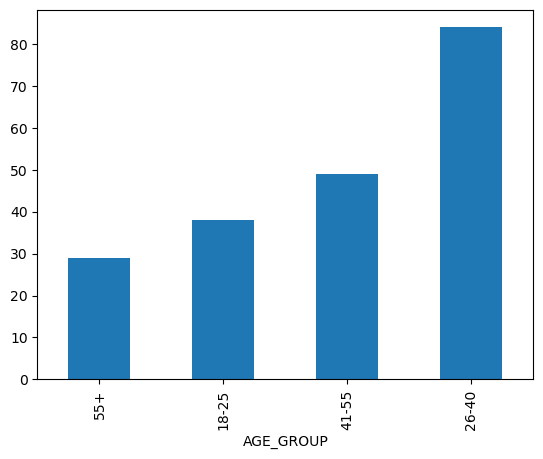

In [38]:
data.groupby('AGE_GROUP').size().sort_values().plot(kind='bar')

<Axes: xlabel='AGE_GROUP', ylabel='count'>

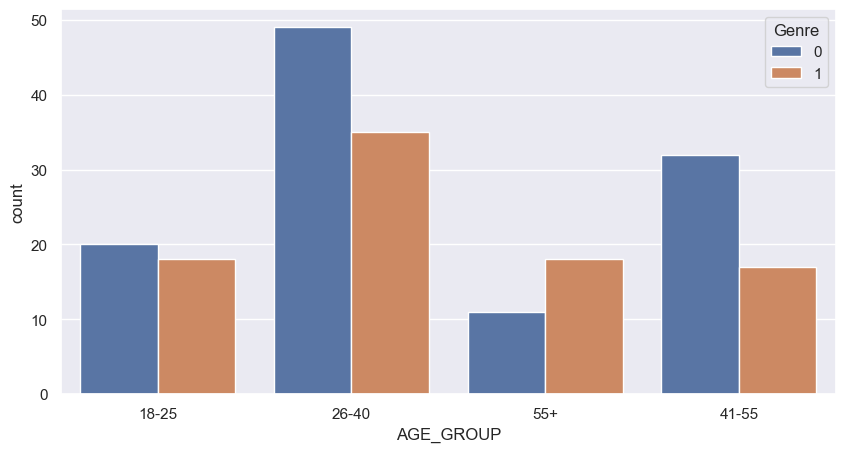

In [42]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x=data['AGE_GROUP'],hue=data['Genre'])

<Axes: >

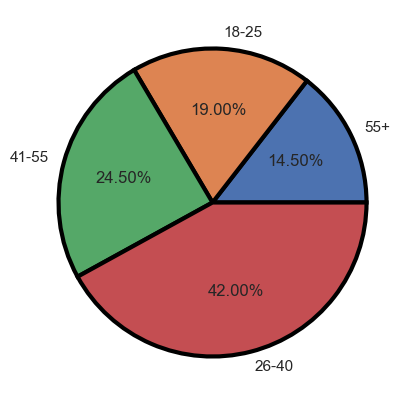

In [43]:
data.groupby('AGE_GROUP').size().sort_values().plot(kind='pie',autopct='%1.2f%%',wedgeprops={'edgecolor':'black','linewidth':3,'antialiased':True})


<Axes: xlabel='Income_Range', ylabel='count'>

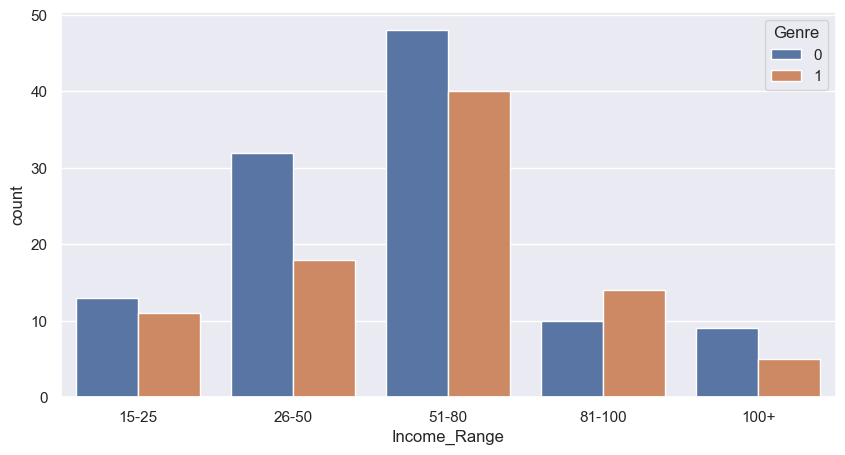

In [44]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x=data['Income_Range'],hue=data['Genre'])

<Axes: xlabel='Score_Range', ylabel='count'>

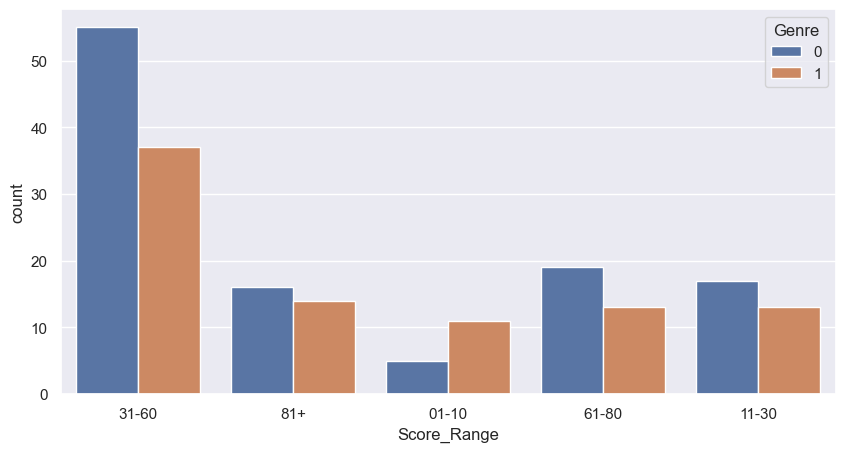

In [45]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x=data['Score_Range'],hue=data['Genre'])